Problem Statement: A National Zoopark in India is dealing with the problem of segregation of the animals based on the different attributes they have. Build a KNN model to automatically classify the animals. Explain any inferences you draw in the documentation.

Business Objective The primary objective of the National Zoopark in India is to automate the classification of animals based on various attributes such as physical characteristics, behavior, and habitat. By implementing a K-Nearest Neighbors (KNN) algorithm, the zoo aims to enhance the efficiency of animal segregation, improve management practices, and provide better care for the animals by understanding their classifications.

Constraints Data Quality: The dataset must be clean and free from missing or erroneous values to ensure accurate model predictions. Computational Resources: The KNN algorithm can be computationally intensive, especially with large datasets, which may require adequate processing power. Interpretability: The model's predictions should be interpretable to allow for adjustments based on zoo management needs. Feature Relevance: Not all features may contribute to the classification, necessitating careful selection and engineering of features.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Mukta\OneDrive\Desktop\Data_Science\KNN_assignment\Datasets\Zoo.csv")

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4

In [5]:
# Prepare the features and target variable
X = data.drop(columns=['animal name', 'type'])  # Features
y = data['type']  # Target variable

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Normalize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Initialize the KNN classifier
k = 5  # You can experiment with different values of K
knn = KNeighborsClassifier(n_neighbors=k)

In [13]:
# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

In [15]:
# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


In [17]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



C:\Users\Mukta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mukta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mukta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
#with different values of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    accuracies.append(score)

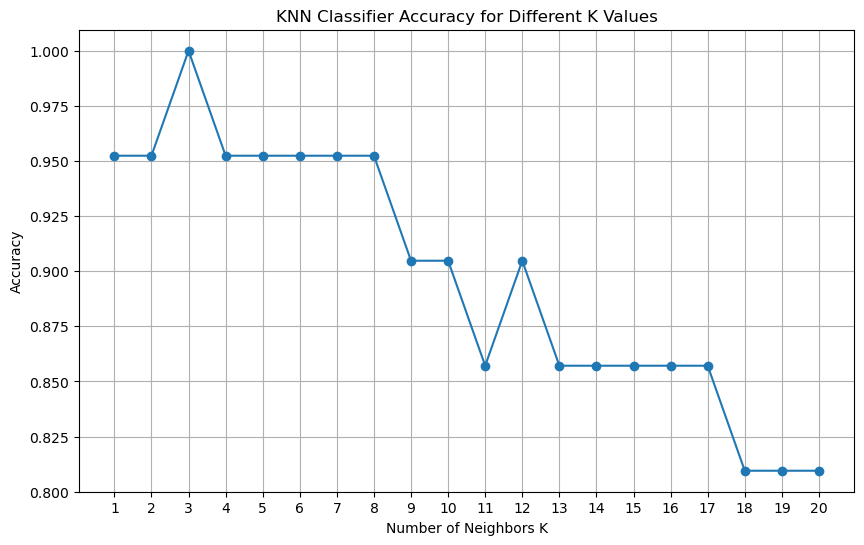

In [23]:
# Display the accuracy for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy for Different K Values')
plt.xticks(np.arange(1, 21, 1))
plt.grid()
plt.show()